<a href="https://colab.research.google.com/github/dangcaptkd/CS114.K21-/blob/master/RunTimeProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
url = 'https://cs.uit.edu.vn/data.txt'
names = ['size', 'time']
dataset = pd.read_csv(url, names=names)

In [36]:
dataset

,size,time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560
...,...,...
5206,6600098,1.804520
5207,5339132,1.450310
5208,4794647,1.293070
5209,4440131,1.196530


In [4]:
dataset.shape

(5211, 2)

In [37]:
dataset['size2'] = dataset['size']*dataset['size']
dataset['sizeLogsize'] = dataset['size']*np.log10(dataset['size'])
dataset

,size,time,size2,sizeLogsize
0,4032139,1.200580,16258144915321,2.663444e+07
1,2055486,0.509774,4225022696196,1.297611e+07
2,5626651,1.476080,31659201475801,3.798130e+07
3,42065,0.007651,1769464225,1.945052e+05
4,6297788,1.661560,39662133692944,4.281984e+07
...,...,...,...,...
5206,6600098,1.804520,43561293609604,4.500970e+07
5207,5339132,1.450310,28506330513424,3.591885e+07
5208,4794647,1.293070,22988639854609,3.203187e+07
5209,4440131,1.196530,19714763297161,2.951531e+07


In [39]:
dataset = pd.DataFrame(dataset, columns=['size2', 'sizeLogsize', 'size', 'time'])
dataset

,size2,sizeLogsize,size,time
0,16258144915321,2.663444e+07,4032139,1.200580
1,4225022696196,1.297611e+07,2055486,0.509774
2,31659201475801,3.798130e+07,5626651,1.476080
3,1769464225,1.945052e+05,42065,0.007651
4,39662133692944,4.281984e+07,6297788,1.661560
...,...,...,...,...
5206,43561293609604,4.500970e+07,6600098,1.804520
5207,28506330513424,3.591885e+07,5339132,1.450310
5208,22988639854609,3.203187e+07,4794647,1.293070
5209,19714763297161,2.951531e+07,4440131,1.196530


In [42]:
data = dataset.values
X = data[:,:3]
Y = data[:,3]
print(X.shape)
print(Y.shape)

(5211, 3)
(5211,)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm  import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4168, 3)
(1043, 3)
(4168,)
(1043,)


In [0]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTreeR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RForestR', RandomForestRegressor()))
models.append(('KNR', KNeighborsRegressor()))

In [97]:
r = {}
for name, model in models:
  print('training and predicting {}...'.format(name))
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  mae = mean_absolute_error(Y_test, pred)
  r[name] = mae

training and predicting LR...
training and predicting DTreeR...
training and predicting SVR...
training and predicting RForestR...
training and predicting KNR...


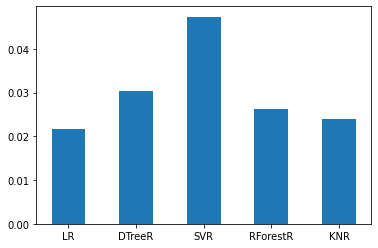

In [98]:
plt.bar(r.keys(), r.values(), width=0.5)
plt.show()